<a href="https://colab.research.google.com/github/glennamaria/task1/blob/main/MF%20Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings("ignore")

In [149]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [150]:
path="/content/drive/MyDrive/Model.csv"
df= pd.read_csv(path)
df

,Guarantor Gender,RelationShip,Pincode,CIBIL Score,Issue Date,Interest Rate,No of group Members,Center Name,Branch Name,FDE,Area,IFSC Code,Criteria
0,Male,Husband,680569.0,661,07-09-2022,25.5,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,DLXB0000006,0
1,Female,Mother,680569.0,-1,07-09-2022,26.0,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,KLGB0040281,0
2,Male,Son,680569.0,678,07-09-2022,25.5,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,SBIN0070641,0
3,Female,Mother,680569.0,-1,07-09-2022,26.0,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,KLGB0040281,0
4,Male,Husband,680613.0,-1,07-09-2022,26.0,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Kandassankadavu,CNRB0000874,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,Male,Husband,613001.0,819,30-03-2024,26.5,6,THANJAVUR,THANJAVUR,LALITH SAMINATHAN,Thanjavur,IDIB000M191,1
10671,Female,Daughter,613009.0,-1,30-03-2024,27.5,6,THANJAVUR,THANJAVUR,LALITH SAMINATHAN,Thanjavur West,UBIN0534901,1
10672,Male,Son,613001.0,762,30-03-2024,26.5,6,THANJAVUR,THANJAVUR,LALITH SAMINATHAN,Thanjavur,IOBA0001364,1
10673,Male,Husband,613001.0,801,30-03-2024,26.5,6,THANJAVUR,THANJAVUR,LALITH SAMINATHAN,Thanjavur,IOBA0001364,1


In [151]:
df.reset_index(drop=False, inplace=True)
df.head()

,index,Guarantor Gender,RelationShip,Pincode,CIBIL Score,Issue Date,Interest Rate,No of group Members,Center Name,Branch Name,FDE,Area,IFSC Code,Criteria
0,0,Male,Husband,680569.0,661,07-09-2022,25.5,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,DLXB0000006,0
1,1,Female,Mother,680569.0,-1,07-09-2022,26.0,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,KLGB0040281,0
2,2,Male,Son,680569.0,678,07-09-2022,25.5,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,SBIN0070641,0
3,3,Female,Mother,680569.0,-1,07-09-2022,26.0,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Edassery,KLGB0040281,0
4,4,Male,Husband,680613.0,-1,07-09-2022,26.0,10,Poonkunnam,Poonkunnam,VIDYASAGAR T S,Kandassankadavu,CNRB0000874,0


In [152]:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('FETURE DATA TYPES:')
    print(data.info())
    print('\n', '-'*50)
    print('NUMBER OF UNIQUE VALUES PER FEATURE:', '\n')
    print(data.nunique())
    print('\n', '-'*50)
    print('NULL VALUES PER FEATURE')
    print(data.isnull().sum())

def make_mi_scores(x, y):

    x = x.copy()
    for colname in x.select_dtypes(["object", "category"]):
        x[colname], _ = x[colname].factorize()

    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in x.dtypes]

    mi_scores = mutual_info_classif(x, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.figure(figsize=(9, 3))
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.xlabel('Mutual Information Score')
    plt.ylabel('Features')
    plt.title('Mutual Information Scores')
    plt.show()

In [153]:
show_info(df)

DATASET SHAPE:  (10675, 14) 

--------------------------------------------------
FETURE DATA TYPES:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                10675 non-null  int64  
 1   Guarantor Gender     10675 non-null  object 
 2   RelationShip         10675 non-null  object 
 3   Pincode              10674 non-null  float64
 4   CIBIL Score          10675 non-null  int64  
 5   Issue Date           10675 non-null  object 
 6   Interest Rate        10675 non-null  float64
 7   No of group Members  10675 non-null  int64  
 8   Center Name          10675 non-null  object 
 9   Branch Name          10675 non-null  object 
 10  FDE                  10668 non-null  object 
 11  Area                 10560 non-null  object 
 12  IFSC Code            10673 non-null  object 
 13  Criteria             10675 non-null 

In [154]:
categorical_features = df.select_dtypes(include=['object']).columns

# labelencode the categorical features
for i, cat in enumerate(categorical_features):
    df[cat] = LabelEncoder().fit_transform(df[cat])

In [155]:
df_encoded = df.copy()
df_encoded.head()

,index,Guarantor Gender,RelationShip,Pincode,CIBIL Score,Issue Date,Interest Rate,No of group Members,Center Name,Branch Name,FDE,Area,IFSC Code,Criteria
0,0,1,2,680569.0,661,67,25.5,10,3,2,43,143,273,0
1,1,0,3,680569.0,-1,67,26.0,10,3,2,43,143,557,0
2,2,1,6,680569.0,678,67,25.5,10,3,2,43,143,851,0
3,3,0,3,680569.0,-1,67,26.0,10,3,2,43,143,557,0
4,4,1,2,680613.0,-1,67,26.0,10,3,2,43,233,144,0


In [156]:
df_encoded = df.copy()
df_encoded

,index,Guarantor Gender,RelationShip,Pincode,CIBIL Score,Issue Date,Interest Rate,No of group Members,Center Name,Branch Name,FDE,Area,IFSC Code,Criteria
0,0,1,2,680569.0,661,67,25.5,10,3,2,43,143,273,0
1,1,0,3,680569.0,-1,67,26.0,10,3,2,43,143,557,0
2,2,1,6,680569.0,678,67,25.5,10,3,2,43,143,851,0
3,3,0,3,680569.0,-1,67,26.0,10,3,2,43,143,557,0
4,4,1,2,680613.0,-1,67,26.0,10,3,2,43,233,144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10670,10670,1,2,613001.0,819,362,26.5,6,7,4,22,606,473,1
10671,10671,0,0,613009.0,-1,362,27.5,6,7,4,22,614,967,1
10672,10672,1,6,613001.0,762,362,26.5,6,7,4,22,606,524,1
10673,10673,1,2,613001.0,801,362,26.5,6,7,4,22,606,524,1


In [157]:
df_encoded = df.copy()
df_encoded.tail()

,index,Guarantor Gender,RelationShip,Pincode,CIBIL Score,Issue Date,Interest Rate,No of group Members,Center Name,Branch Name,FDE,Area,IFSC Code,Criteria
10670,10670,1,2,613001.0,819,362,26.5,6,7,4,22,606,473,1
10671,10671,0,0,613009.0,-1,362,27.5,6,7,4,22,614,967,1
10672,10672,1,6,613001.0,762,362,26.5,6,7,4,22,606,524,1
10673,10673,1,2,613001.0,801,362,26.5,6,7,4,22,606,524,1
10674,10674,1,2,613001.0,756,362,26.5,6,7,4,22,606,681,1


In [158]:
df_encoded = df.copy()
df_encoded.head()

,index,Guarantor Gender,RelationShip,Pincode,CIBIL Score,Issue Date,Interest Rate,No of group Members,Center Name,Branch Name,FDE,Area,IFSC Code,Criteria
0,0,1,2,680569.0,661,67,25.5,10,3,2,43,143,273,0
1,1,0,3,680569.0,-1,67,26.0,10,3,2,43,143,557,0
2,2,1,6,680569.0,678,67,25.5,10,3,2,43,143,851,0
3,3,0,3,680569.0,-1,67,26.0,10,3,2,43,143,557,0
4,4,1,2,680613.0,-1,67,26.0,10,3,2,43,233,144,0


In [159]:
df_encoded.dropna(inplace=True)
df.dropna(inplace=True)

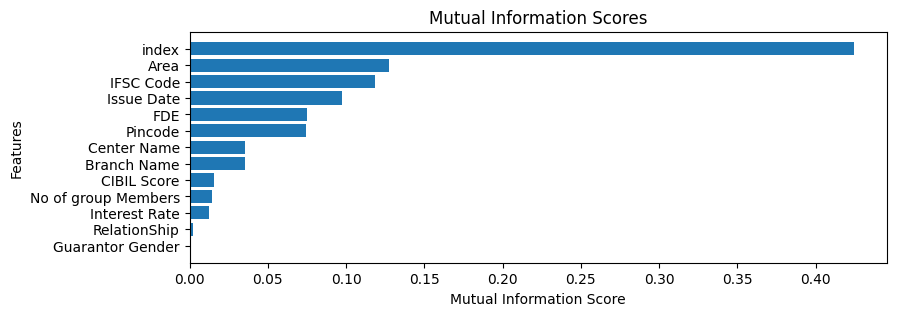

In [160]:
X = df_encoded.drop('Criteria', axis=1)
y = df_encoded['Criteria']

mi_scores = make_mi_scores(X, y)
plot_mi_scores(mi_scores)

<Axes: >

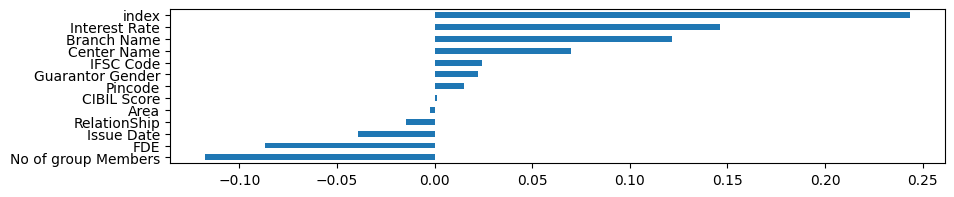

In [161]:
corr = df_encoded.corr()
corr_y = corr['Criteria'].sort_values(ascending=True)
corr_y = corr_y.drop('Criteria')
plt.figure(figsize=(10, 2))
corr_y.plot(kind='barh')

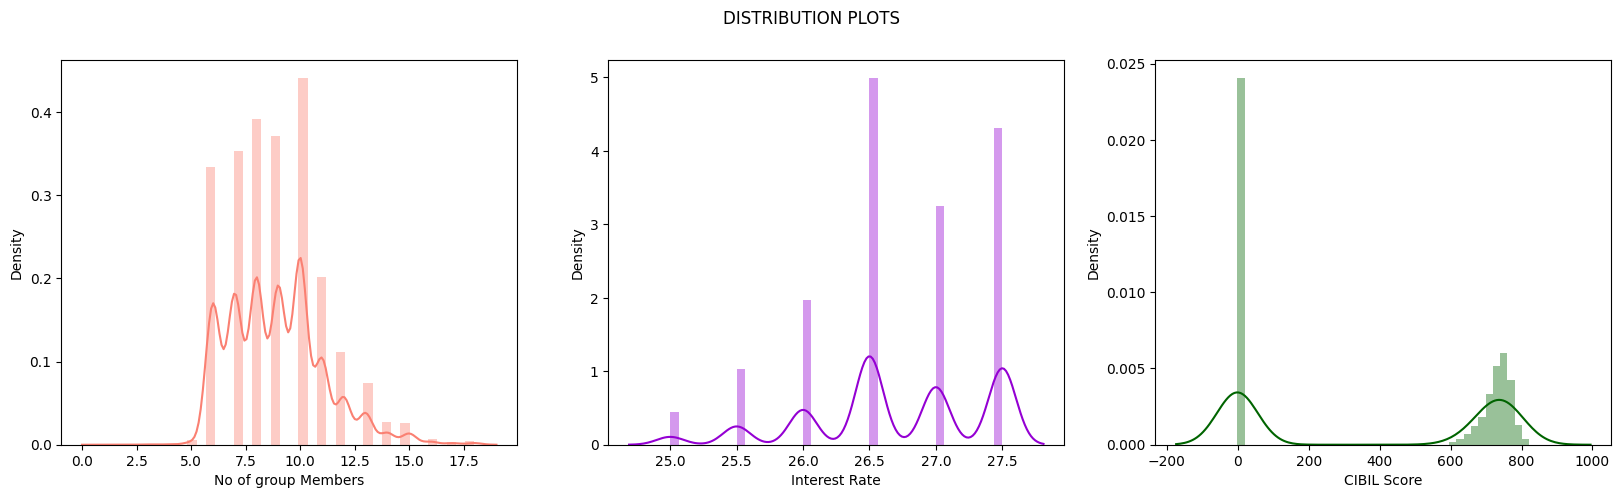

In [162]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
plt.suptitle('DISTRIBUTION PLOTS')
sns.distplot(df['No of group Members'], bins=40, ax=ax[0], color='salmon');
sns.distplot(df['Interest Rate'], bins=40, ax=ax[1], color='darkviolet');
sns.distplot(df['CIBIL Score'], bins=40, ax=ax[2], color='darkgreen');

In [163]:
df = df[["Guarantor Gender", "Area", "RelationShip"]]
Status = df_encoded['Criteria']

In [164]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

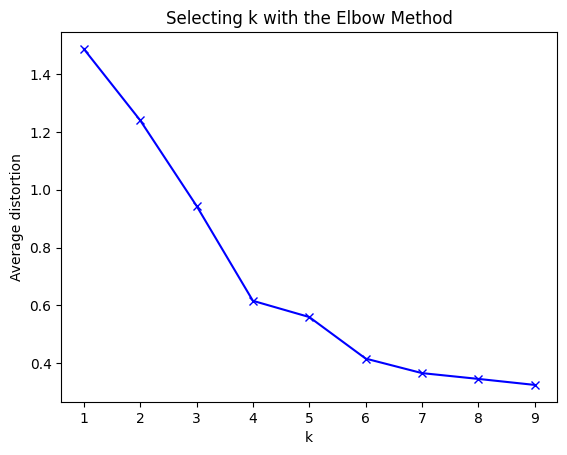

In [165]:
meanDistortions=[]

for k in range(1, 10):
    model=KMeans(n_clusters=k)
    model.fit(scaled_df)
    prediction=model.predict(scaled_df)
    meanDistortions.append(sum(np.min(cdist(scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / scaled_df.shape[0])

plt.plot(range(1, 10), meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

In [166]:
model = KMeans(n_clusters=4)
model.fit(scaled_df)
preds = model.predict(scaled_df)

In [167]:
labels = model.labels_
silhouette_score(scaled_df, labels, metric='euclidean')

0.5903369622655587

In [168]:
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

# here we add the predictions to the unscaled data so that we can gain some real world interpretability
df['Kmean_grouping'] = preds
df["Status"] = Status

scaled_df["Kmean_grouping"] = preds

df.groupby('Kmean_grouping').count()

,Guarantor Gender,Area,RelationShip,Status
Kmean_grouping,,,,
0,3679,3679,3679,3679
1,4476,4476,4476,4476
2,1199,1199,1199,1199
3,1320,1320,1320,1320


In [169]:
df.groupby('Kmean_grouping').mean().round({'Area':0,'IFSC Code':0,'RelationShip':0})


,Guarantor Gender,Area,RelationShip,Status
Kmean_grouping,,,,
0,1.0,159.0,2.0,0.863278
1,1.0,545.0,2.0,0.843834
2,0.0,378.0,2.0,0.826522
3,1.0,387.0,6.0,0.846970
